In [1]:
import numpy as np
from math import pi
from qiskit import *
%matplotlib inline

# Teleportacja kwantowa

wizualizacja stanu kubitu po bramce ry(pi/3, 0)

{'0': 750, '1': 274}


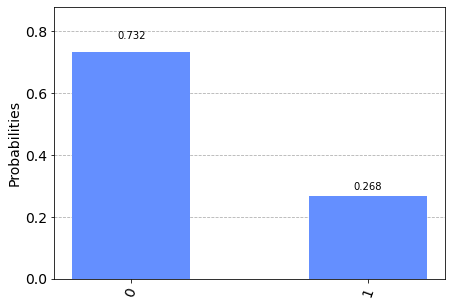

In [2]:
circ = QuantumCircuit(1,1)
# zmiana stanu q0

circ.ry(pi/3, 0)

circ.measure(0,0)

backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
#histogram z symulatora pokozuje prawdopodobieństwo zaistnienia poszczególnych stanów
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

teleportacja

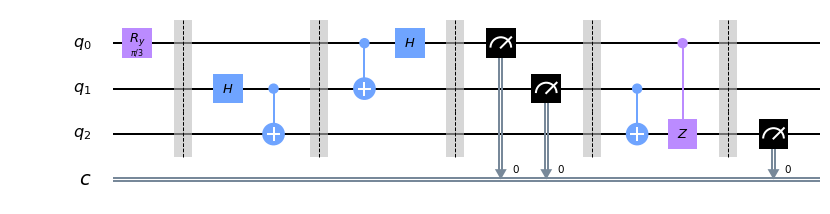

In [3]:
circ = QuantumCircuit(3,1)
# zmiana stanu q0
circ.ry(pi/3, 0)
circ.barrier()
circ.h(1)
circ.cx(1,2)
# tworzenie stanu Bella
# q1 zostaje u Alicji
# q2 przesyłany do Bolka 
circ.barrier()
# Alicja dołącza q0 o nieznanym stanie do q1 z pary Bella
circ.cx(0,1)
circ.h(0)
circ.barrier()
# następnie Alicja wykonuje pomiar w bazie Bella
# w trakcie pomiaru q2 Bolka zmienił się
circ.measure(0,0)
circ.measure(1,0)
# Alicja przesyła bolkowi otrzymany wynik klasycznym kanałem komunikacyjnym
circ.barrier()
# Bolek stosuje odpowiednie bramki w zależności od tego co otrzymał od Alicji
circ.cx(1,2)
circ.cz(0,2)
# w wyniku tych operacji Bolek dostaje u siebie nieznany stan Alicji
circ.barrier()
circ.measure(2,0)
circ.draw()

{'0': 741, '1': 283}


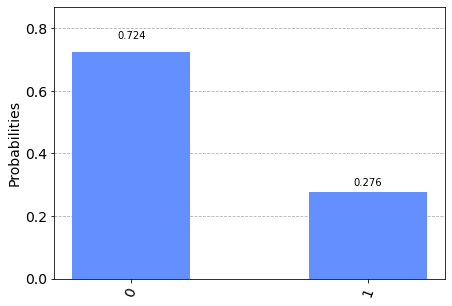

In [4]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
#histogram z symulatora pokozuje prawdopodobieństwo zaistnienia poszczególnych stanów
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## zmiana miejsca pomiarów dla umożliwienia obliczeń na rzeczywistym komputerze kwantowym

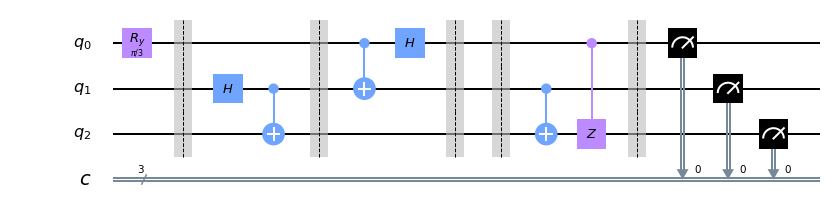

In [5]:
circ = QuantumCircuit(3,3)
# zmiana stanu q0
circ.ry(pi/3, 0)
circ.barrier()
circ.h(1)
circ.cx(1,2)

circ.barrier()

circ.cx(0,1)
circ.h(0)

circ.barrier()

circ.barrier()

circ.cx(1,2)
circ.cz(0,2)

circ.barrier()
circ.measure(0,0)
circ.measure(1,0)
circ.measure(2,0)
circ.draw()

{'000': 770, '001': 254}


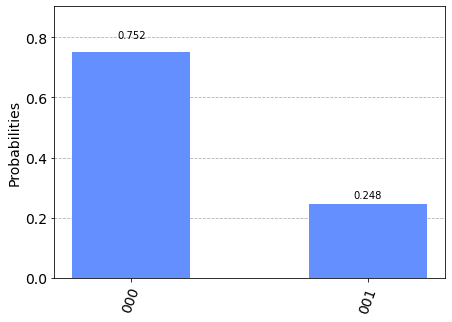

In [6]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
#histogram z symulatora pokozuje prawdopodobieństwo zaistnienia poszczególnych stanów
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [7]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_burlington')
from qiskit.tools.monitor import job_monitor

In [8]:
job_exp = execute(circ, backend=backend, shots=2048)
job_monitor(job_exp)

Job Status: job has successfully run


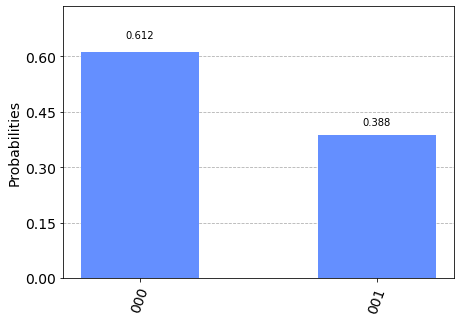

In [9]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram(counts_exp)
#histogram z prawdziwego komuptera kwantowego pokazuje prawdopodobieństwo zaistnienia poszczególnych stanów